# Analisando o bot

Este jupyter-notebook vai auxiliar na análise das `intents` do Lino bot.

### Configurando jupyter

In [1]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

Verificando versões:

In [2]:
import rasa_nlu

print("rasa_nlu: {}".format(rasa_nlu.__version__))

rasa_nlu: 0.13.7


### Treinando o modelo do Rasa NLU

Na celula abaixo todas as intents na pasta `../data/intents/` serão utilizadas para gerar os gráficos de avaliação do bot.

Ela irá treinar o modelo e executar a avaliação que pode ser verificada na saída da célula abaixo.

INFO:rasa_nlu.training_data.loading:Training data format of ../rasa/data/intents/notifications.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 161 (4 distinct intents)
	- Found intents: 'asks_about_register_notifications', 'notification_types', 'notifications', 'asks_about_unregister_notification'
	- entity examples: 57 (4 distinct entities)
	- found entities: 'register_notification', 'notification_types', 'option', 'notification'

INFO:rasa_nlu.training_data.loading:Training data format of ../rasa/data/intents/offenses.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 39 (1 distinct intents)
	- Found intents: 'offenses'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../rasa/data/intents/documents.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 84 (4 distinct intents)
	- Found i

INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 867 (27 distinct intents)
	- Found intents: 'start', 'asks_regular_proof', 'compliments', 'asks_register_proof', 'asks_menu', 'notifications', 'asks_about_register_notifications', 'calendar', 'help', 'asks_weekly_menu', 'start_flow', 'thanks', 'deny', 'asks_about_documents', 'notification_types', 'asks_daily_menu', 'affirm', 'asks_dinner_menu', 'goodbye', 'greet', 'offenses', 'asks_lunch_menu', 'asks_about_gmail', 'out_of_scope', 'asks_breakfast_menu', 'asks_about_schedule', 'asks_about_unregister_notification'
	- entity examples: 495 (9 distinct entities)
	- found entities: 'period', 'meal', 'notification_types', 'command', 'notification', 'option', 'documents', 'register_notification', 'calendar'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 867 examples that have a defined intent out of 867 examples
INFO:rasa_nlu.evaluate:F1-Score:

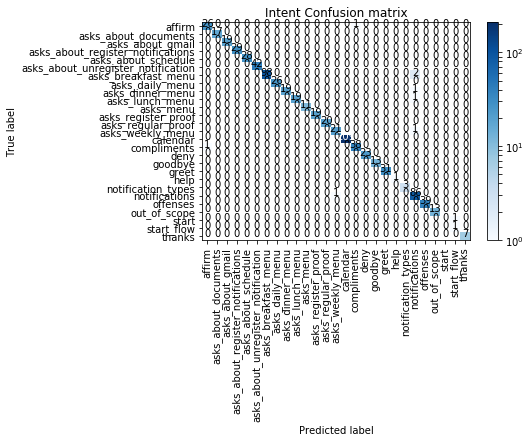

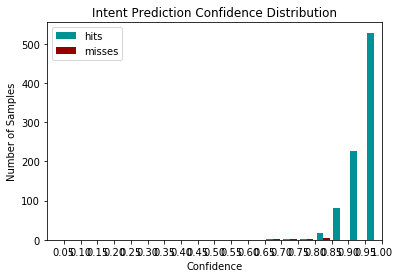

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9813393661218425
INFO:rasa_nlu.evaluate:Precision: 0.9829892094712109
INFO:rasa_nlu.evaluate:Accuracy:  0.9825740602439632
INFO:rasa_nlu.evaluate:Classification report: 
                       precision    recall  f1-score   support

             calendar       1.00      1.00      1.00       479
              command       1.00      1.00      1.00         2
            documents       0.96      1.00      0.98       107
                 meal       0.90      0.97      0.93       220
            no_entity       0.99      0.99      0.99      3021
         notification       1.00      0.56      0.72        61
   notification_types       1.00      1.00      1.00         3
               option       0.94      0.98      0.96        48
               period       0.98      0.98      0.98        48
register_notification       0.94      0.54      

In [3]:
import os

from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config


intents_directory = '../rasa/data/intents/'

intents = {}

for intent_file in os.listdir(intents_directory):
    intent_file_path = os.path.join(intents_directory, intent_file)

    intents[intent_file] = {}

    intent_list = []
    intent_name = None

    with open(intent_file_path) as f:
        lines = f.readlines()

        for line in lines:
            line = line.strip()

            if line.startswith('##'):
                if intent_name is not None:
                    intents[intent_file][intent_name] = intent_list
                intent_name = line.replace('## intent:', '') 
                intent_list = []

            elif line.startswith('- '):
                intent_list.append(line.replace('- ', ''))


# loading the nlu training samples
training_data = load_data(intents_directory)

# trainer to educate our pipeline
trainer = Trainer(config.load("../rasa/nlu_config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

from rasa_nlu.evaluate import run_evaluation
run_evaluation('../rasa/data/intents/', model_directory)

## Problemas encontrados nas intents

Após análisar as intents, foram encontrados alguns problemas. Quando existe correlção entre intents (valores diferentes de 0 que não estão na diagonal principal da matriz) indica que exemplos de `intents` estão presentes em `intents` dististas, logo cada `intent` com problema deve ser revisada.

Para auxiliar na solução dos problemas encontrados segue abaixo a lista de problemas gerados:

In [4]:
%cat errors.json

{
    "intent_errors": [
        {
            "text": "semana",
            "intent": "notifications",
            "intent_prediction": {
                "name": "asks_weekly_menu",
                "confidence": 0.7512494325637817
            }
        },
        {
            "text": "start",
            "intent": "start",
            "intent_prediction": {
                "name": "start_flow",
                "confidence": 0.7312785983085632
            }
        },
        {
            "text": "top",
            "intent": "affirm",
            "intent_prediction": {
                "name": "compliments",
                "confidence": 0.8423963189125061
            }
        },
        {
            "text": "topzera",
            "intent": "compliments",
            "intent_prediction": {
                "name": "affirm",
                "confidence": 0.6973128914833069
            }
        },
        {
            "text": "cardápio da semana",
            "intent": "asks_weekly_m

### Avaliação do modelo de NLU treinado

`Caso queira testar mensagens específicas mande a mensagem na célula seguinte`

In [5]:
pprint(interpreter.parse('Oi, Lino'))

{
  "intent": {
    "name": "greet",
    "confidence": 0.9379720687866211
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "greet",
      "confidence": 0.9379720687866211
    },
    {
      "name": "asks_weekly_menu",
      "confidence": 0.20514674484729767
    },
    {
      "name": "asks_daily_menu",
      "confidence": 0.10473138839006424
    },
    {
      "name": "goodbye",
      "confidence": 0.10203015059232712
    },
    {
      "name": "asks_about_gmail",
      "confidence": 0.07626049965620041
    },
    {
      "name": "compliments",
      "confidence": 0.06361744552850723
    },
    {
      "name": "asks_dinner_menu",
      "confidence": 0.06010682135820389
    },
    {
      "name": "out_of_scope",
      "confidence": 0.0586763396859169
    },
    {
      "name": "asks_about_register_notifications",
      "confidence": 0.043457236140966415
    },
    {
      "name": "affirm",
      "confidence": 0.03725492209196091
    }
  ],
  "text": "Oi, Lino"
}
